In [1]:
import cv2
import numpy as np
from skimage.io import imread
import glob 
import os
import matplotlib.pyplot as plt
from skimage.exposure import equalize_hist
from skimage.filters import gaussian

In [ ]:
image_folder = "../data/original_images"

# Get all .tif files in the directory
image_paths = glob.glob(os.path.join(image_folder, "*.tif"))

image_rgb = imread(image_paths[0])

In [2]:
def color_segmentation(image_rgb):
    hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
    
    # Define purple ranges
    lower_purple = np.array([130, 30, 30])  # H(0-180), S(0-255), V(0-255)
    upper_purple = np.array([170, 255, 255])
    
    # Create mask
    mask = cv2.inRange(hsv, lower_purple, upper_purple)
    
    # Post-processing
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    
    return mask

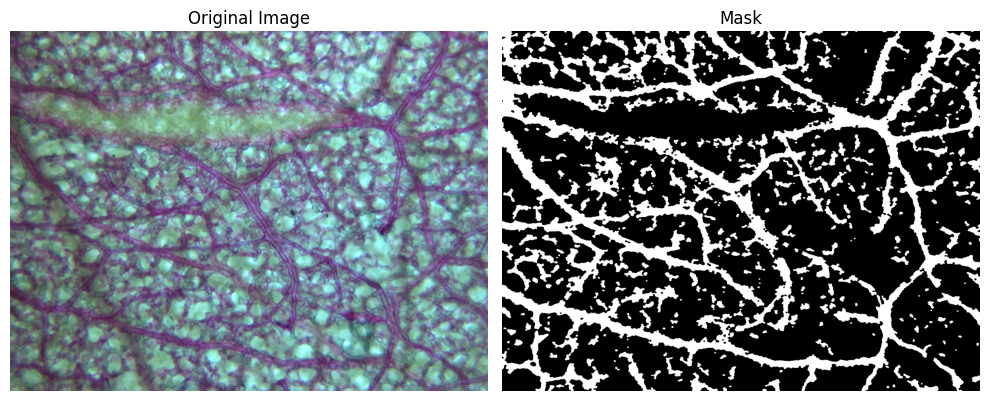

In [ ]:
mask = color_segmentation(image_rgb)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(mask, cmap='gray')
axes[1].set_title('Mask K-Means')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
def kmeans_segmentation(image_rgb, k=3):
    # Reshape and convert to float
    pixel_values = image_rgb.reshape((-1, 3)).astype(np.float32)
    
    # K-means clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Find the purple cluster
    hsv_centers = cv2.cvtColor(np.array([centers]).astype(np.uint8), cv2.COLOR_RGB2HSV)[0]
    purple_idx = np.argmax(hsv_centers[:,0])  # Highest hue value
    
    # Create mask
    mask = labels.reshape(image_rgb.shape[:2]) == purple_idx
    return mask.astype(np.uint8) * 255

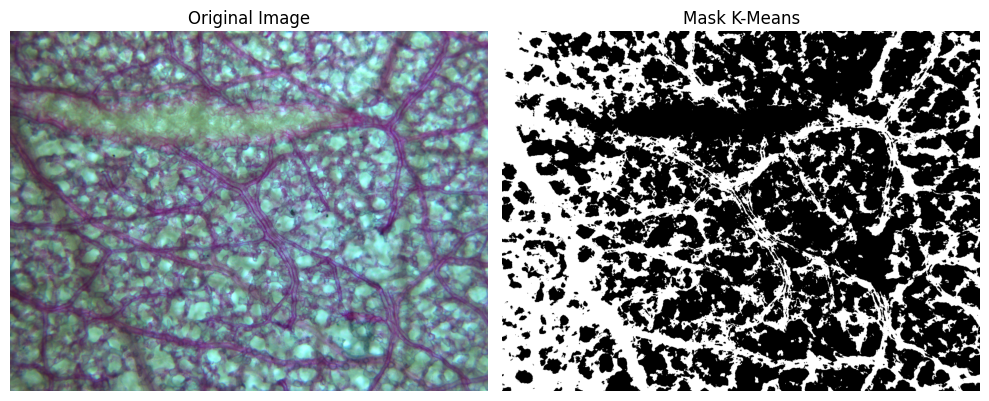

In [ ]:
kmeans_mask = kmeans_segmentation(image)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(kmeans_mask, cmap='gray')
axes[1].set_title('Mask K-Means')
axes[1].axis('off')

plt.tight_layout()
plt.show()